In [4]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft


class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self):
        fig = plt.figure()
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
               
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = np.fft.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(self.From, self.To, len(ifft_y))
        return [ifft_x, ifft_y]
        
    

  
def get_step_Func(f_From, f_To, f_cut_From, f_cut_To, N_pts, amplitude):
    #N_pts = get_points_numb(f_From, f_To, df)
    Step_Func = Function((FuncParams(f_From, f_To, 1, 1, 0, N_pts)))
    Step_Func.calc(step, f_cut_From, f_cut_To, amplitude)
    return Step_Func
    

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y 

def get_module(y):
    res = []
    for i in range(len(y)):
        res.append(abs(y[i]))
    return res


def plot_y(y, title, From = 0, To = 0):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    if(From != 0 or To != 0):
        x = np.linspace(From, To, len(y))
        sp.plot(x,y)
    else:
        sp.plot(y)
    fig.show()


def IFFT(x, y, from_, to_):
    ifft_y = np.fft.ifft(y)
    #spacing_period = (self.From-self.To)/self.N
    ifft_x = np.linspace(from_, to_, len(ifft_y))
    return [ifft_x, ifft_y]


def FFT(x, y, from_, to_, N):
    '''fft_lib_res = np.fft.fft(y)
    spacing_period = (from_ - to_ / N)

    xf = fftfreq(N, spacing_period)
    return [fftshift(xf), fftshift(fft_lib_res)]'''
    fft_lib_res = np.fft.fft(y)
    
    spacing_period = (to_ - from_)#(to_ - from_ / N)
    x_fft = []
    for i in range(0, len(fft_lib_res)):
        x_fft.append(i / spacing_period)
       
    return [x_fft, fft_lib_res]


def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)


def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))


def step(x, *args, **kwargs):
    step_from_, step_to_, ampl_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    
    samples_num = len(x)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = ampl_#1#1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

# Получение неидеального фильтра - От синкуса надо оставить часть точек, а остальное добить нулями
# Пробуем оставить часть точек синкуса, а остальные добить нулями
def cut_filter(Pts_to_keep, y_filt):
    Pts_to_keep_left = []
    Pts_to_keep_right = []
    if(Pts_to_keep%2 == 0):
        Pts_to_keep_aside = int(Pts_to_keep / 2)
        print(Pts_to_keep_aside)
        how_many_zeros = len(y_filt) - Pts_to_keep
        Pts_to_keep_left = y_filt[0 : Pts_to_keep_aside]
        Pts_to_keep_right = y_filt[ len(y_filt) - Pts_to_keep_aside : len(y_filt)]
        res = np.concatenate([Pts_to_keep_left, np.zeros(how_many_zeros)])
        res = np.concatenate([res, Pts_to_keep_right])
        return res

def adjust_filter(y):
    #print('len x = ', len(x))
    #x = change_halves(x, len(x)%2 == 0)
    y = change_halves(y, len(y)%2 == 0)
    return y

def mirror_func(x, y):
    x_ = list(x)
    x_ = np.flip(x)
    x_ = [-i for i in x_]
    x_ = np.concatenate([x_, x])
    
    y_ = list(y)
    y_ = np.flip(y_)
    y_  = np.concatenate([y_, y])
    return [x_, y_]

def change_halves(x, is_even):
    x_ = []
    if(is_even):
        x_ = x[len(x)//2 : ]
        print('x even len half x = ', len(x_))
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    else:
        print('x not even')
        x_ = x[len(x)//2 : ]
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    return x_

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    sp.plot(x, y)
    fig.show()
    
    
def get_FFT_cut(Func):
    [x_fft, y_fft] = FFT(Func.x, Func.y, Func.From, Func.To, Func.N)
    x_fft_cut = x_fft[0 : len(x_fft)//2]
    y_fft_cut = y_fft[0: len(y_fft)//2]
    return [x_fft_cut, y_fft_cut]


def get_fourier_of_filtered_signal(src_spectrum, step):
    y_res = []
    if(len(src_spectrum) == len(step)):
        for i in range(len(src_spectrum)):
            y_res.append(src_spectrum[i] * step[i])
    return y_res
    
    
def plot_func_and_FFT(x, y, title):
    To = x[len(x)-1]
    From = x[0]
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(121)
    sp.plot(x, y, label = 'src func')
    sp.legend()
    
    [x_fft, y_fft] = FFT(x, y, From, To, len(x))
    sp = fig.add_subplot(122)
    sp.plot(x_fft, (y_fft), label = 'Fourier')
    sp.legend()
    
    fig.show()
    
    

  


In [6]:
#P = 4. Т.е. от t_from до t_to было 100 точек, на них был расчитан синус. 
# Сделаем 100*P точек, расчитаем синус, но оставим каждую 4-тую точку, а остальные занулим
def add_zeros(arr, P):
    # повышаем в P раз - после каждой точки вставить P нулей
    zeros = np.zeros(P)
    
    
    #counter = 1
    arr_ = list(arr)
    i = 0
    while (i != len(arr_)-1):
        arr_ = np.insert(arr_, i+1, zeros)
        i += P+1
    return arr_

def cut_coefficients(src, Q):
    res = []
    res.append(src[0])
    counter = 0
    for i in range(1, len(src)):
        if counter == Q:
            res.append(src[i])
            counter = 0
        counter += 1
    res.append(src[len(src) - 1])
    return res


def plot_resample_low_pass_filtered(Src_Func, P, Q, f_cut, func_title, step_ampl):
    
    Src_Func.y = add_zeros(Src_Func.y, P-1)
    Src_Func.N = len(Src_Func.y)
    Src_Func.reset_x()
    Src_Func.plot()
    #print("New pts numb = ", sin_Func.N)
    
    [x_fft, y_fft] = FFT(Src_Func.x, Src_Func.y, Src_Func.From, Src_Func.To, Src_Func.N)
      
    
    
    coefficient = int(x_fft[len(x_fft)-1]//f_cut)
    x_fft_cut = x_fft[0 : len(x_fft)//coefficient]
    y_fft_cut = y_fft[0: len(y_fft)//coefficient]
    #plot_func_and_FFT(Src_Func.x, Src_Func.y, 'Src func ' + str(func_title))

    Step_Func = get_step_Func(0, x_fft[len(x_fft)-1], 0, f_cut, len(x_fft), step_ampl) # 5 == F_Nykvist / 2
    #plot_func_and_FFT(Step_Func.x, Step_Func.y, 'Step')


    # добиваем нулями
    delta = abs(len(y_fft_cut) - len(Step_Func.x))
    y_fft_cut = np.append(y_fft_cut, np.zeros(delta))
    y_fourier_filtered = get_fourier_of_filtered_signal((y_fft_cut), Step_Func.y)


    [x_filtered, y_filtered] = IFFT(x_fft_cut, y_fourier_filtered, 0, 1)
    # Проредить y_filtered - берём каждый Q-й коэффициент
    y_filtered = cut_coefficients(y_filtered, Q)
    x = np.linspace(Src_Func.From, Src_Func.To, len(y_filtered))
    
    Func = Function(FuncParams(Src_Func.From, Src_Func.To, 1, 1, 0, len(y_filtered)))
    Func.x = x
    Func.y = y_filtered
    Func.plot()
    print("New pts numb = ", Func.N)
    #plot_func_and_FFT(x, y_filtered, 'Filtered signal (Perfect Filter) ' + str(func_title))
        

Old pts numb =  40
New pts numb =  118


<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


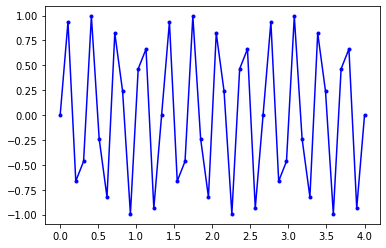

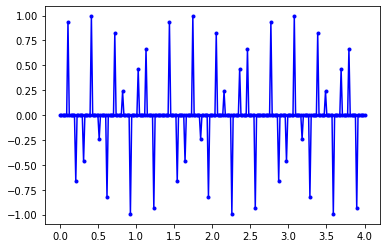

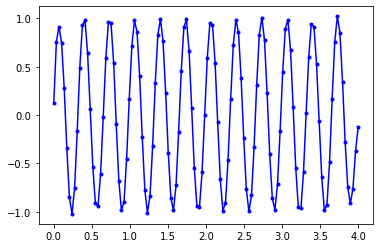

In [7]:
t_from = 0
t_to = 4
sampling_freq_before = 10
N = get_points_numb(t_from, t_to, 1/sampling_freq_before)


f1 = 3
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
print("Old pts numb = ", sin_Func.N)
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x)
sin_Func.plot()


P = 6 # Во сколько раз будем повышать частоту дискретизации
Q = 2
f_resample = min(sampling_freq_before/2, sampling_freq_before * (P / Q)/2)
plot_resample_low_pass_filtered(sin_Func, P, Q, f_resample, 'Sin Func', P*2)




Old pts numb =  60
New pts numb =  178


<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


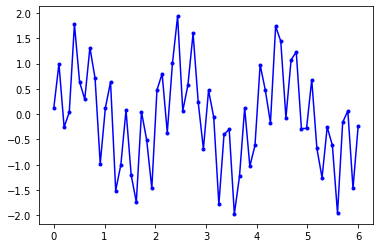

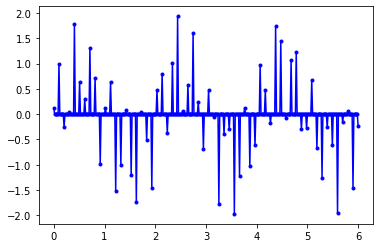

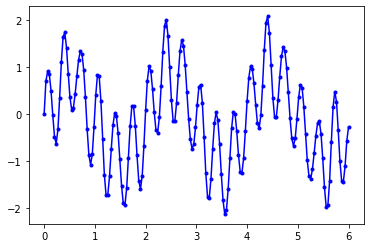

In [8]:
t_from = 0
t_to = 6
sampling_freq_before = 10
N = get_points_numb(t_from, t_to, 1/sampling_freq_before)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)
sin_Func.plot()

print("Old pts numb = ", sin_Func.N)
P = 6 # Во сколько раз будем повышать частоту дискретизации
Q = 2
f_resample = min(sampling_freq_before/2, sampling_freq_before * (P / Q)/2)
plot_resample_low_pass_filtered(sin_Func, P, Q, f_resample, 'Noize + two freq sin', P*2)


Old pts numb =  60
New pts numb =  60


<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


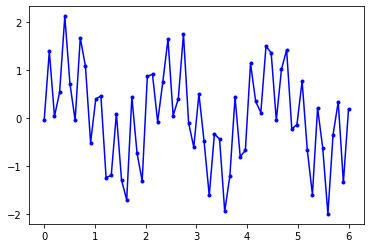

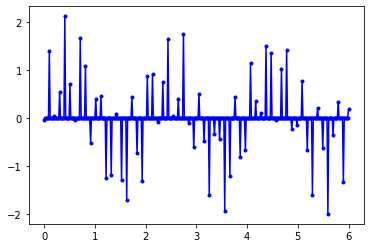

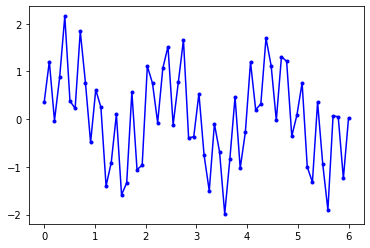

In [9]:
# Повышение и понижение частоты дискретизации в одно и то же количество раз
t_from = 0
t_to = 6
sampling_freq_before = 10
N = get_points_numb(t_from, t_to, 1/sampling_freq_before)


f1 = 3
f2 = 0.5
noize_level=0.3
noize_intensity=0.17
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f1* sin_Func.x) + np.sin(2*np.pi * f2*sin_Func.x)
sin_Func.noize(noize_intensity, noize_level)
sin_Func.plot()


print("Old pts numb = ", sin_Func.N)
P = 6 # Во сколько раз будем повышать частоту дискретизации
Q = 6
f_resample = min(sampling_freq_before/2, sampling_freq_before * (P / Q)/2)
plot_resample_low_pass_filtered(sin_Func, P, Q, f_resample, 'Noizy Sin, f1=3, f2=0.5 + noize', P*2)



Old pts numb =  150
New pts numb =  597


<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


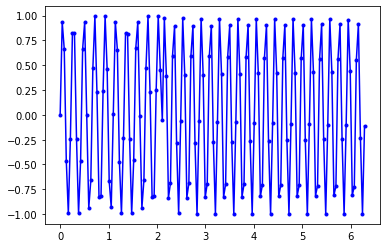

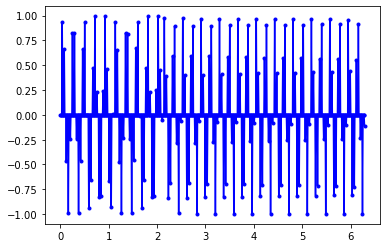

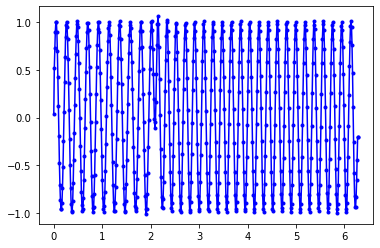

In [10]:
# Пример сначала с обной частотой, потом с другой
points_numb_left = 50
points_numb_right = 100
f_1 = 3
f_2 = 7
t_from = 0
t_middle = np.pi
t_to = 2*np.pi


x = np.linspace(t_from, t_middle, points_numb_left)
y = np.sin(2*np.pi*f_1*x)

x = np.linspace(t_middle, t_to, points_numb_right)
y_temp = np.sin(2*np.pi*f_2*x)
y_concat=np.concatenate([y,y_temp])

Double_freq_func = Function((FuncParams(from_=t_from, to=t_to, ampl=1, omega=1, shift=0, N=points_numb_left+points_numb_right)))

x = np.linspace(t_from, t_to, Double_freq_func.N)
Double_freq_func.x=x
Double_freq_func.y=np.concatenate([y,y_temp])
Double_freq_func.plot()
print("Old pts numb = ", Double_freq_func.N)
P = 4 
Q = 1
sampling_freq_before = Double_freq_func.N / (Double_freq_func.To - Double_freq_func.From)
f_resample = min(sampling_freq_before/2, sampling_freq_before * (P / Q)/2)

plot_resample_low_pass_filtered(Double_freq_func, P, Q, f_resample, 'Double freq func f1=' + str(f1) + ', f2=' + str(f2), P*2)



Old pts numb =  30
New pts numb =  291


<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1ae57f265555>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


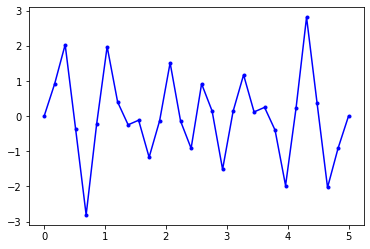

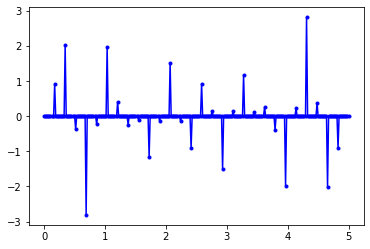

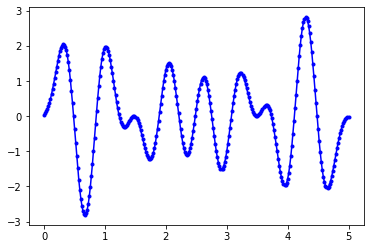

In [11]:
#Сумма синусов  - Увеличение частоты семплирования в 10 раз
t_from = 0
t_to = 5
sampling_freq_before = 6
N_pts = get_points_numb(t_from, t_to, 1/sampling_freq_before)
sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N_pts)))
sin_Func.reset_x()



f1=1
f2=4
f3=7
sin_Func.y = np.sin(f1 * 2 * np.pi * sin_Func.x) + np.sin(f2 * 2 * np.pi * sin_Func.x) + np.sin(f3 * 2 * np.pi * sin_Func.x)
sin_Func.plot()



print("Old pts numb = ", sin_Func.N)
P = 10
Q = 1
f_resample = min(sampling_freq_before/2, sampling_freq_before * (P / Q)/2)
plot_resample_low_pass_filtered(sin_Func, P, Q, f_resample, 'Double freq func f1=' + str(f1) + ', f2=' + str(f2), P*2)

